# SARS-CoV-2 and MERS-CoV Mpro retrospective validation plots

Plotting the results of performing the retrospectove validation between SARS-CoV-2 and MERS-CoV. The data is obtained via the pipeline introduced in the paper and included in the `/data` folder.


In [12]:
import pandas as pd
import numpy as np
from scripts.plot_results import plot_affinity_compare

## Plot correlation between predicted and experimental affinities
We import the experimental IC50s from the `mers_ic50s.csv` and `sars_ic50s.csv` files in `data`, as well as the predicted scores.

In [13]:
mers_ic50 = pd.read_csv("data/mers_ic50s.csv")
sars_ic50 = pd.read_csv("data/sars_ic50s.csv")

mers_pred = pd.read_csv("data/mers_predicted_scores.csv")
sars_pred = pd.read_csv("data/sars_predicted_scores.csv")

### MERS-CoV results

We predicted 394/416 binders from experiment, out of which 383 are also predicted from theory


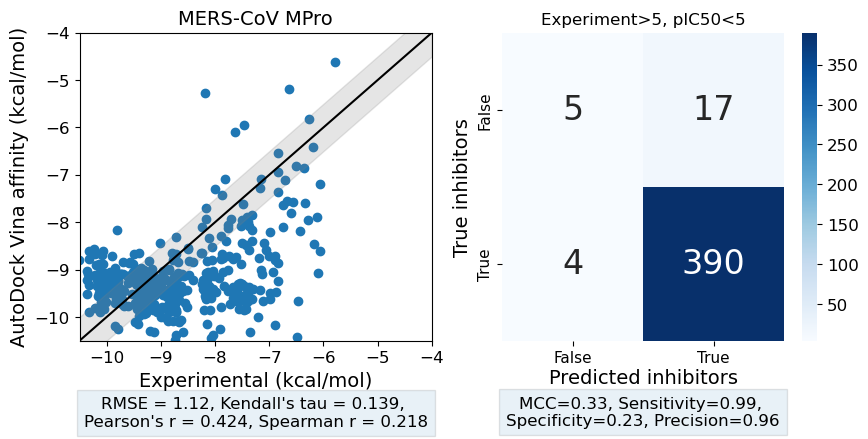

In [14]:
aff_df, fig, a, b = plot_affinity_compare(mers_ic50,
                                          mers_pred,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='Minh pIC50',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )

AUC is 0.88, with bootstrap-sampling is 0.88+/-0.002
95% Confidence Interval: [0.77, 0.97]
We predicted 394/416 binders from experiment, out of which 383 are also predicted from theory


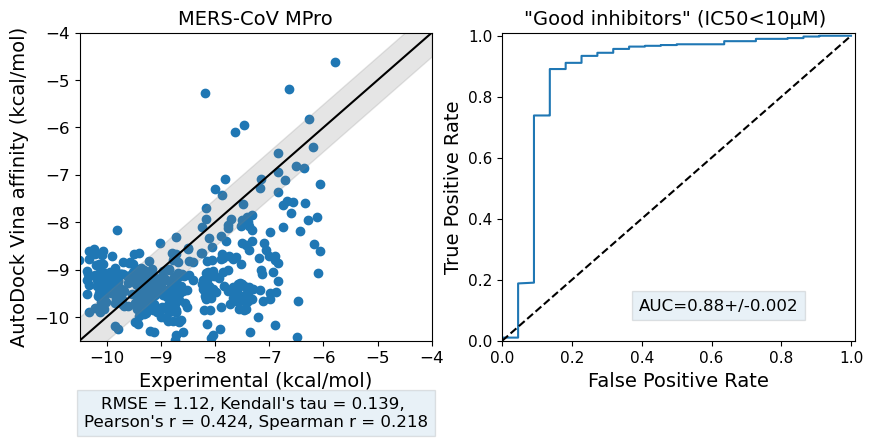

In [15]:
aff_df, fig, a, b = plot_affinity_compare(mers_ic50,
                                          mers_pred,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='Minh pIC50',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

AUC is 0.91, with bootstrap-sampling is 0.91+/-0.001
95% Confidence Interval: [0.84, 0.97]
We predicted 395/417 binders from experiment, out of which 386 are also predicted from theory


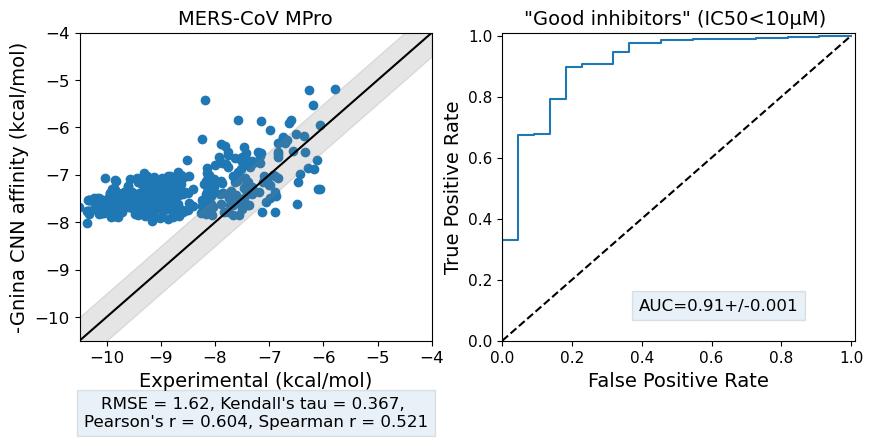

In [16]:
aff_df, fig, a, b = plot_affinity_compare(mers_ic50,
                                          mers_pred,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='Minh pIC50',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="-Gnina CNN affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

### SARS-CoV-2 results

We predicted 361/451 binders from experiment, out of which 317 are also predicted from theory


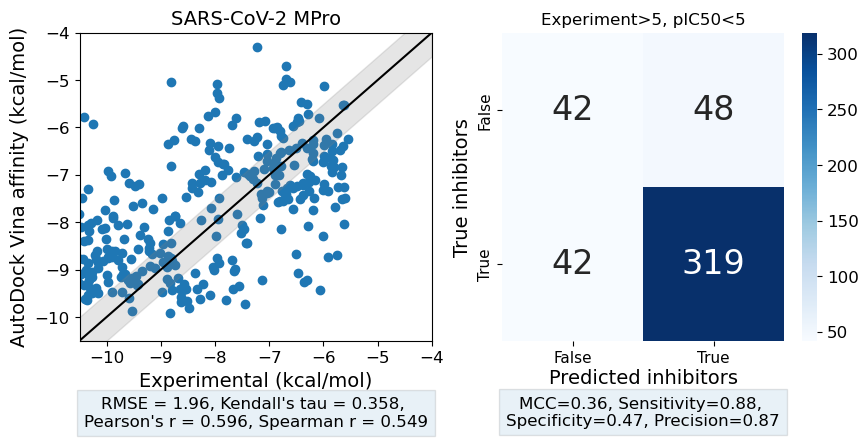

In [17]:
aff_df, fig, a, b = plot_affinity_compare(sars_ic50,
                                          sars_pred,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='IC50 lower (µM)',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )

AUC is 0.82, with bootstrap-sampling is 0.82+/-0.001
95% Confidence Interval: [0.77, 0.86]
We predicted 361/451 binders from experiment, out of which 317 are also predicted from theory


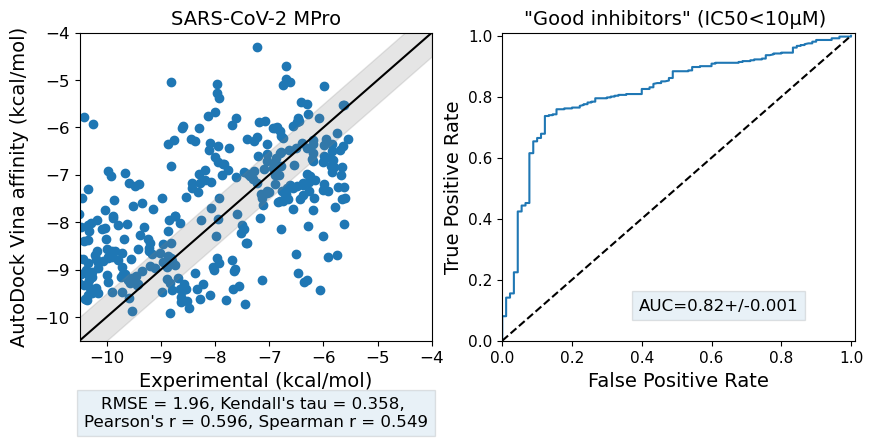

In [18]:
aff_df, fig, a, b = plot_affinity_compare(sars_ic50,
                                          sars_pred,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='IC50 lower (µM)',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

AUC is 0.86, with bootstrap-sampling is 0.86+/-0.001
95% Confidence Interval: [0.82, 0.90]
We predicted 361/451 binders from experiment, out of which 323 are also predicted from theory


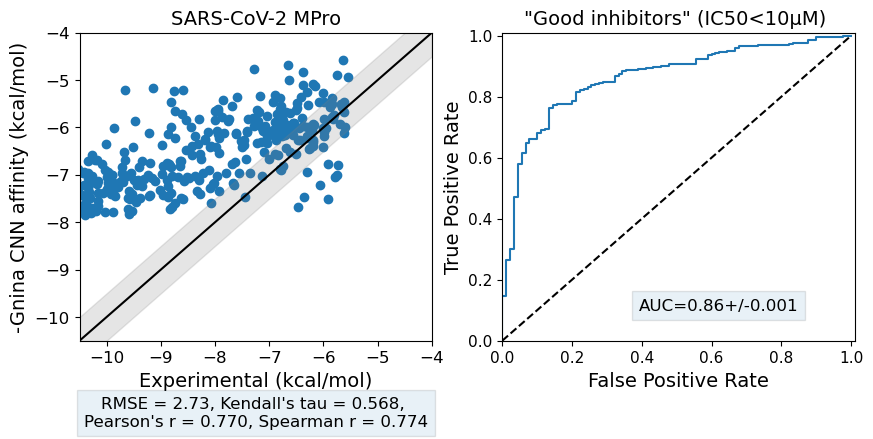

In [19]:
aff_df, fig, a, b = plot_affinity_compare(sars_ic50,
                                          sars_pred,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='IC50 lower (µM)',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="-Gnina CNN affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )